# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def dice_10():
    dice_result = []
    for i in range(10):
        dice_rolling = random.randint(1,6)
        dice_result.append(dice_rolling)
    return dice_result

first_roll = dice_10()
first_roll

[4, 6, 6, 3, 1, 1, 3, 5, 4, 1]

#### 2.- Plot the results sorted by value.

In [3]:
# your code here
dice_df = pd.DataFrame(first_roll, columns = ['roll_result'])
sorted_roll = dice_df.roll_result.sort_values()
sorted_roll

4    1
5    1
9    1
3    3
6    3
0    4
8    4
7    5
1    6
2    6
Name: roll_result, dtype: int64

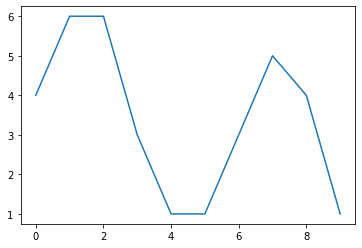

In [37]:
dice_df['roll_result'].plot()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1162b0310>]],
      dtype=object)

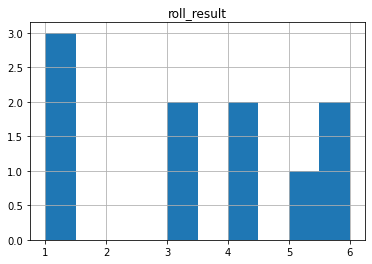

In [35]:
# your code here

freq = dice_df.roll_result.value_counts()
dice_df.hist()



If we plot a linear graph we will only see a linear representation
of the changes in the values for each throw of the dice. While for the 
histogram we can more clearly see the occurrences for each result value.


## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [40]:
# your code here
def mean(x):
    sum_i = 0
    for i in x:
        sum_i += i
    mean = sum_i/len(x)
    return mean

3.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [43]:
# your code here
def freq_dist(rolls):
    freq_dist = {}
    for i in rolls:
        if i in freq_dist: 
            freq_dist[i] += 1
        else:
            freq_dist[i] = 1
    return freq_dist

print(freq_dist(first_roll))

print(mean(first_roll))

{4: 2, 6: 2, 3: 2, 1: 3, 5: 1}
3.4


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [45]:
# your code here
def median(rolls):
    median = 0
    rolls.sort()
    for i in rolls:
        if len(rolls) % 2 == 1:
            median = rolls[(len(rolls)+1)//2]
        else :
            median = rolls[len(rolls)//2]
    return median

median(first_roll)

4

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [10]:
# your code here

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [86]:
# your code here
dice_100 = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice_100

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


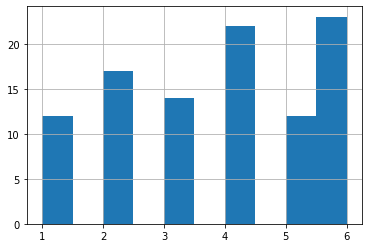

In [59]:
dice_100['value'].hist()

In [12]:
"""
From the figure above, we see that for 100 rolls of the dice there's a higher probability of
getting 4 or 6. While the lowest probabilities are 1 and 5.
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [61]:
# your code here
mean(dice_100.value)

3.74

#### 3.- Now, calculate the frequency distribution.


In [63]:
# your code here
freq_dist = freq_dist(dice_100.value)

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

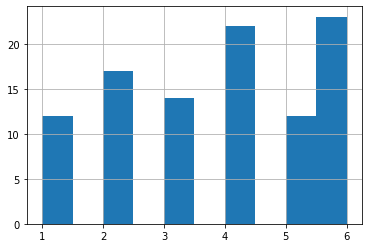

In [67]:
# your code here
dice_100['value'].hist()

In [16]:
"""
We could see the values are almost equally distributed with a small skew to the right,
being the mean 3,74
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

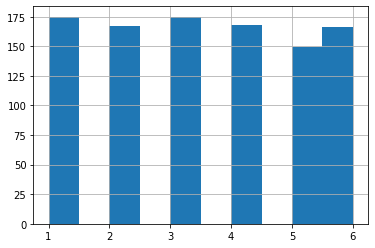

In [85]:
# your code here
dice_1000 = pd.read_csv('../data/roll_the_dice_thousand.csv')
dice_1000.drop(columns='Unnamed: 0', inplace=True)
dice_1000.value.hist()

In [18]:
"""
The more the iterations, the more the dice results are evenly distributed.
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [84]:
# your code here
age_pop = pd.read_csv('../data/ages_population.csv')
age_pop

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d1b2190>]],
      dtype=object)

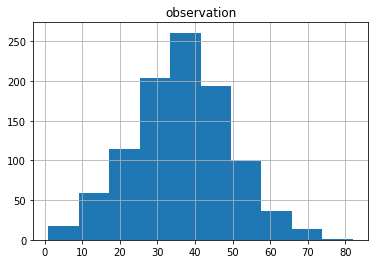

In [93]:
age_pop.hist()

I guess the mean will be around the 30 - 40 age range. While the standard deviation will be around 10.  

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [92]:
# your code here
print(age_pop.mean())
print(age_pop.std())


observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [21]:
"""
The sample above has an average age of 37 years and 68% of the data is between 25 and
49 years old.
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d209710>]],
      dtype=object)

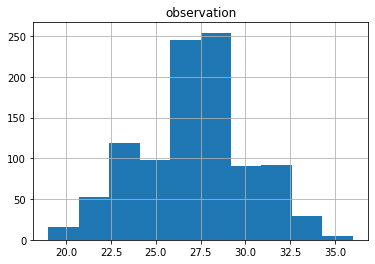

In [99]:
# your code here
age_pop2 = pd.read_csv('../data/ages_population2.csv')
age_pop2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [23]:
"""
Yes, even if they are both distributed normally there seems to be a much smaller standard
deviation making the curve more pronounced. Also the mean must be smaller.
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [100]:
# your code here
print(age_pop2.mean())
print(age_pop2.std())

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [25]:
"""
My hypothesis from above is confirmed. Seems like 68 of the data is between
24 and 30 years old.
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d3a1310>]],
      dtype=object)

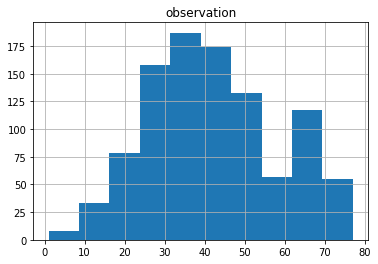

In [102]:
# your code here
age_pop3 = pd.read_csv('../data/ages_population3.csv')
age_pop3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [103]:
# your code here
print(age_pop3.mean())
print(age_pop3.std())

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [28]:
"""
The data seems more similar to the one in the first set of data. Althought we see
an average age of 41 years old (older people in the sample) and that 68% of the observations
are between 25 and 57 years old. The distribution seems to be more skewed to the right.
Making this sample the oldest one. 
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [110]:
# your code here
age_pop3_quartile = age_pop3.quantile([.25,.5, .75, 1])
age_pop3_quartile

,observation
0.25,30.0
0.50,40.0
0.75,53.0
1.00,77.0


In [111]:
age_pop3.median()

observation    40.0
dtype: float64

In [30]:
"""
There's just 1 year of difference between the mean and the median. The mean is higher than the median
making our data to be slightly right skewed.
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [112]:
# your code here
age_pop3_quintile = age_pop3.quantile([.20,.4, .80, 1])
age_pop3_quintile

,observation
0.2,28.0
0.4,36.0
0.8,57.0
1.0,77.0


In [32]:
"""
Dividing into fifths we can see with more evidence that the data is skewed to the right.
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [33]:
# your code here

In [34]:
"""
your comments here
"""

'\nyour comments here\n'